<a href="https://colab.research.google.com/github/harim4422/tensorflow2_deeplearning/blob/master/RNN_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d crowdflower/first-gop-debate-twitter-sentiment

  0% 0.00/2.40M [00:00<?, ?B/s]
100% 2.40M/2.40M [00:00<00:00, 79.8MB/s]


In [0]:
!unzip first-gop-debate-twitter-sentiment.zip

Archive:  first-gop-debate-twitter-sentiment.zip
  inflating: Sentiment.csv           
  inflating: database.sqlite         


In [0]:
!ls

database.sqlite				kaggle.json  Sentiment.csv
first-gop-debate-twitter-sentiment.zip	sample_data


In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import pandas as pd

TensorFlow 2.x selected.


In [0]:
import re

data = pd.read_csv('Sentiment.csv')
data = data[['text', 'sentiment']]
data = data[data.sentiment != "Neutral"]
data['text'] = data['text'].apply(lambda x: x.lower())
data['text'] = data['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

In [0]:
print(data[ data['sentiment'] == 'Positive'].size)
print(data[ data['sentiment'] == 'Negative'].size)

4472
16986


In [0]:
from sklearn.model_selection import train_test_split

for idx,row in data.iterrows():
    row[0] = row[0].replace('rt',' ')
    
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=2000, split=' ')
tokenizer.fit_on_texts(data['text'].values)
X = tokenizer.texts_to_sequences(data['text'].values)
X = tf.keras.preprocessing.sequence.pad_sequences(X)

Y = pd.get_dummies(data['sentiment']).values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)

In [0]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(2000, 128, input_length=X.shape[1]),
                             tf.keras.layers.SpatialDropout1D(0.4),
                             tf.keras.layers.LSTM(196, dropout=0.2, recurrent_dropout=0.2),
                             tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 28, 128)           256000    
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 28, 128)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 394       
Total params: 511,194
Trainable params: 511,194
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(X_train, Y_train, epochs=20, validation_split=0.25, callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')])

Train on 5391 samples, validate on 1797 samples
Epoch 1/20
5391/5391 [==============================] - 16s 3ms/sample - loss: 0.4663 - accuracy: 0.8041 - val_loss: 0.3988 - val_accuracy: 0.8408
Epoch 2/20
5391/5391 [==============================] - 14s 3ms/sample - loss: 0.3286 - accuracy: 0.8629 - val_loss: 0.3750 - val_accuracy: 0.8492
Epoch 3/20
5391/5391 [==============================] - 13s 2ms/sample - loss: 0.2768 - accuracy: 0.8828 - val_loss: 0.3812 - val_accuracy: 0.8481
Epoch 4/20
5391/5391 [==============================] - 13s 2ms/sample - loss: 0.2488 - accuracy: 0.8958 - val_loss: 0.4126 - val_accuracy: 0.8414
Epoch 5/20
5391/5391 [==============================] - 13s 2ms/sample - loss: 0.2248 - accuracy: 0.9080 - val_loss: 0.4501 - val_accuracy: 0.8497


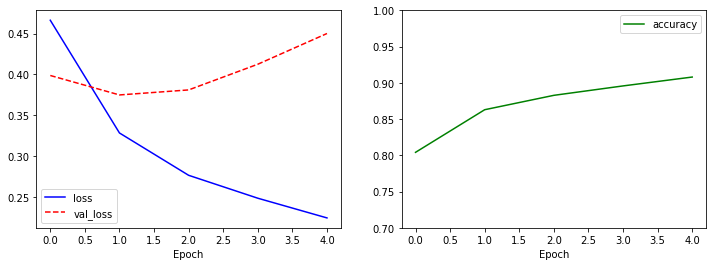

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [0]:
model.evaluate(X_test, Y_test, verbose=2, batch_size=32)

3541/3541 - 1s - loss: 0.4180 - accuracy: 0.8492


[0.41802483543741, 0.8491951]

In [0]:
ex1 = ['i hate him']
ex2 = ['i love you']
ex1 = tokenizer.texts_to_sequences(ex1)
ex2 = tokenizer.texts_to_sequences(ex2)

ex1 = tf.keras.preprocessing.sequence.pad_sequences(ex1, maxlen=28, dtype='int32', value=0)
ex2 = tf.keras.preprocessing.sequence.pad_sequences(ex2, maxlen=28, dtype='int32', value=0)

sentiment1 = model.predict(ex1,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment1) == 0):
    print("negative")
elif (np.argmax(sentiment1) == 1):
    print("positive")

sentiment2 = model.predict(ex2,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment2) == 0):
    print("negative")
elif (np.argmax(sentiment2) == 1):
    print("positive")

1/1 - 0s
negative
1/1 - 0s
positive
